# Pipeline Part 1
1) Clean data and feature engineering
2) Split data into training, validation, query, and testing
3) Set aside validation & query sets (25%, 25%)
4) Dimension reduction of all sets separately


In [2]:
import pandas as pd
from sklearn import model_selection
import sys
import numpy as np
sys.path.insert(0, '/Users/gracewang/Documents/GitHub/elecfinal')
from Data.data_cleaner import cleaner


In [3]:
## Clean data
train_path = "../Data/train_data.csv"
feature_path = "../Data/feature_weights.csv"
morph_path = "../Data/morph_embeddings.csv"
data = cleaner(train_path, feature_path, morph_path)


In [4]:
data.shape

(185832, 27)

In [5]:
## Split data into training, validation, query, and testing
X = data.drop(columns='connected')
y = data['connected']
X_train, X_oth, y_train, y_oth = model_selection.train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_query, y_val, y_query = model_selection.train_test_split(X_oth, y_oth, test_size=0.25, random_state=42)


## Dimension Reduction

### Method Consideration
Avoid:
- nonnegative matrix factorization: we have negative values
- independent component analysis: factors may not be statistically independent; there are correlated features

Consider:
- PCA
- manifold learning: https://scikit-learn.org/stable/modules/manifold.html


In [1]:
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn import preprocessing


In [2]:
def col_cleaner(df):
    new_df = df._get_numeric_data().drop(columns=["ID", "connected", "pre_nucleus_id", "post_nucleus_id"])

    # standardize
    scaler = preprocessing.StandardScaler().fit(new_df)
    scaled_df = scaler.transform(new_df)
    scaled_df = pd.DataFrame(scaled_df, columns=new_df.columns)
    scaled_df["connected"]=df['connected']
    return scaled_df

In [3]:
def dimred_plot(X_transformed, num):
    X_plot = pd.DataFrame(X_transformed).join(pd.DataFrame(y_train[0:num]).reset_index())
    X_plot.rename(columns={0:"x", 1:"y"}, inplace=True)
    X_plot
    sns.scatterplot(X_plot, x='x', y='y', hue='connected')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

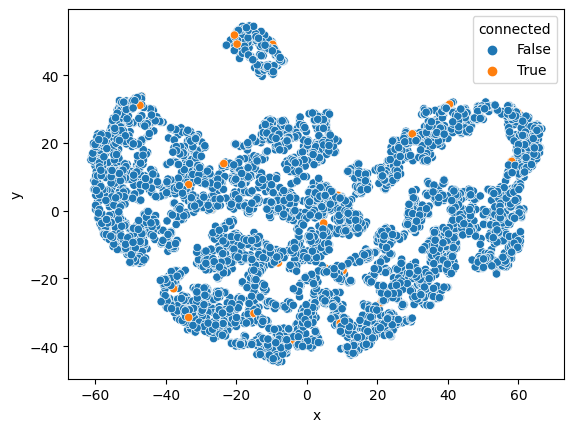

In [77]:
model = TSNE(n_components=2, perplexity = 50)
num = 5000
X_transformed = model.fit_transform(X_train_dists[0:num])
dimred_plot(X_transformed, num)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

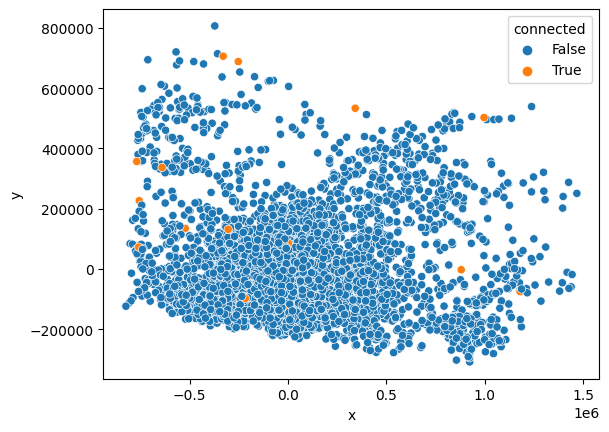

In [78]:
X_pca = PCA(n_components=2).fit_transform(X_train_dists[0:num])
dimred_plot(X_pca, num)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

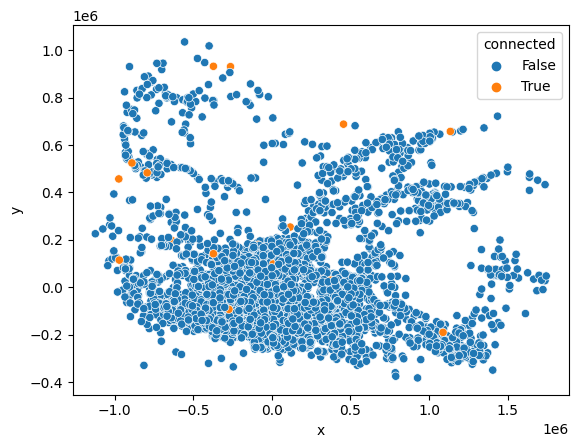

In [81]:
X_pca = Isomap(n_components=2).fit_transform(X_train_dists[0:num])
dimred_plot(X_pca, num)